In [32]:
%pylab inline
import numpy as np
from matplotlib import pylab as plt
from sympy import*
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum import Dagger
init_printing(use_unicode=True)
from scipy.optimize import leastsq
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import argrelextrema
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from scipy import linalg
from qutip import *

Populating the interactive namespace from numpy and matplotlib


/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['roots', 'prod', 'Line2D', 'flatten', 'plotting', 'conjugate', 'floor', 'plot', 'sign', 'reshape', 'zeros', 'cbrt', 'trace', 'Polygon', 'axes', 'squeeze', 'poly', 'eye', 'power', 'plt', 'exp', 'pi', 'sin', 'tanh', 'linalg', 'sinc', 'seterr', 'tan', 'ones', 'multinomial', 'test', 'array', 'solve', 'take', 'interactive', 'sinh', 'add', 'binomial', 'nan', 'identity', 'transpose', 'source', 'invert', 'trunc', 'diag', 'beta', 'vectorize', 'entropy', 'Circle', 'cosh', 'shape', 'product', 'log', 'gamma', 'diff', 'mod', 'deprecated', 'sqrt', 'info', 'var', 'cos', 'det']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:
#Definir vectores propios matrices de pauli
sx1 = Matrix([1/sqrt(2),1/sqrt(2)])
sx2 = Matrix([1/sqrt(2),-1/sqrt(2)])
sy1 = Matrix([1/sqrt(2),1j/sqrt(2)])
sy2 = Matrix([1/sqrt(2),-1j/sqrt(2)])
sz1 = Matrix([1,0])
sz2 = Matrix([0,1])
Id = Matrix([[1,0],[0,1]])
     
vectors=[sx1,sx2,sy1,sy2,sz1,sz2]

#crear proyectores
proyectores=[]
for element in vectors:
    proyectores.append((element*Dagger(element)))

In [34]:
#Se ingresa el estado diagonal, y retorna las posiciones de 0,pi/2,pi....
guess_omega = 18
guess_phase = -np.pi/2
def dar_posiciones(datx,diag1,guess_omega,guess_phase):
    guess_mean = np.mean(diag1)
    guess_std = 3*np.std(diag1)/(2**0.5)

    
    optimize_func = lambda x: x[0]*np.cos(x[1]*datx+x[3]) + x[2] - diag1
    est_std, est_omega, est_mean, est_phase = leastsq(optimize_func,[guess_std, guess_omega, guess_mean, guess_phase])[0]
    
    print(est_std, est_omega, est_mean, est_phase)
    
    
    x0=-(est_phase+np.pi)/est_omega
    xpi2=(np.pi/2-est_phase+np.pi)/est_omega
    xpi=(np.pi-est_phase+np.pi)/est_omega
    x3pi2=(3*np.pi/2-(est_phase)+np.pi)/est_omega
    x2pi=(2*np.pi-(est_phase)+np.pi)/est_omega
    
    return([x0,xpi2,xpi,x3pi2,x2pi])
   
#Se ingresa el arreglo con posiciones de 0,pi/2,pi... del diagonal, y retorna la estadística en cada base proyectada. 

#Se modificó este con respecto al anterior

def dar_probabilidades(e1,e2,e3,e4,e5,e6):       
    normx=e1+e2
    p1=e1/normx
    p2=e2/normx
    
    normy=e3+e4
    p3=e3/normy
    p4=e4/normy    
    
    normz=e5+e6
    p5=e5/normz
    p6=e6/normz
    
    
    return ([p1,p2,p3,p4,p5,p6])

#Se ingresan las estadísticas, y retorna la matriz densidad. 
def dar_matriz_densidad(probabilidades):
    prueba=Matrix([[0,0],[0,0]])
    for i in range (6):
        prueba+=probabilidades[i]*(proyectores[i]-Matrix((1/3)*Id))
    
    pruebaa=np.matrix(prueba).astype(complex_).ravel()
    w=-(real(pruebaa[0,0])-real(pruebaa[0,3]))
    u=2*real(pruebaa[0,1])
    v=-2*imag(pruebaa[0,1])
    
    return(prueba,[u,v,w])

def dar_matriz_densidad_teorica(r,theta,phi):
    theta=deg2rad(2*(theta+22.5))
    phi=deg2rad(phi)
    
    alpha=cos(theta)
    betha=np.e**(1j*phi)*sin(theta)
    
    rho=Matrix([[alpha**2,alpha*np.conj(betha)],[np.conj(alpha)*betha,abs(betha)**2]])
    return (rho)

def dar_fidelidad(teorica,experimental):
    x=(np.matrix(teorica).astype(complex_))
    y=(np.matrix(experimental).astype(complex_))
    resp= (real(np.trace(linalg.sqrtm(dot(dot(linalg.sqrtm(x),y),linalg.sqrtm(x))))))**2
    return(round(resp,4))

def dar_pureza(experimental):
    x=(np.matrix(experimental).astype(complex_))
    resp=real(np.trace(dot(x,x)))
    return(round(float(resp),4))
    
def dar_real_matriz(matriz):
    parte_real=real(np.matrix(matriz).astype(complex_)).ravel()
    return (np.array(parte_real)[0])

def dar_imag_matriz(matriz):
    parte_im=imag(np.matrix(matriz).astype(complex_)).ravel()
    return(np.array(parte_im)[0])
    
    
def barPlot(z, ax):
    x = np.arange(2)
    y = np.arange(2)

    
    zmin = z.min()
    bottom = np.zeros(4)
    xx=[0.1, 1.1, 0.1, 1.1]
    yy=[0.1, 0.1, 1.1, 1.1]
    
    ax.bar3d(xx, yy, bottom, [0.8,0.8,0.8,0.8], [0.8,0.8,0.8,0.8], z, alpha = 1)

    ax.set_xticks(np.arange(min(x)+0.5, max(x)+1.5, 1.0))
    ax.set_yticks(np.arange(min(y)+0.5, max(y)+1.5, 1.0))
    ax.set_zticks([-1,-0.5,0,0.5,1])

    labelsX = [r"$\left|b\right\rangle$",r"$\left|a\right\rangle$"]
    labelsY = [r"$\left|b\right\rangle$",r"$\left|a\right\rangle$"]

    ax.set_xticklabels(labelsX)
    ax.set_yticklabels(labelsY)
    ax.set_zticklabels([-1,-0.5,0,0.5,1])
    
    ax.tick_params(axis='both', labelsize=20)

    ax.set_zlim(min(zmin, 0), max(z.max(), 0))

    XX = np.arange(0, max(x)+2, 1)
    YY = np.arange(0, max(y)+2, 1)
    XX, YY = np.meshgrid(XX, YY)
    ZZ = np.zeros_like(XX)
    ax.plot_surface(XX, YY, ZZ,  linewidth=5, color = 'k', alpha = 0.1)
    fig.patch.set_facecolor('white')
    ax.set_axis_bgcolor('white')
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    plt.tight_layout()


    ax.set_zlim(-1, 1, 0)
    ax.view_init(30, 30)

    return ax

def dar_estadisticas_camino(a1c2,c2a1,a1a2):
    
    pos0=[]
    pos1=[]
    pos2=[]
    pos3=[]
    
    abierto_1=[]
    abierto_2=[]
    

    for i in range (int((len(a1a2)-1)/4)):
        i=4*i
        pos0.append(a1a2[i])
        pos1.append(a1a2[i+1])
        pos2.append(a1a2[i+2])
        pos3.append(a1a2[i+3])
        
    pos0=np.array(pos0)
    pos1=np.array(pos1)
    pos2=np.array(pos2)
    pos3=np.array(pos3)
    
    for i in range (int((len(a1c2)-1)/6)):
        
        i=6*i 
        
        abierto_1.append(a1c2[i,6])
        abierto_2.append(c2a1[i,6])
        
        
    abierto_1=np.array(abierto_1)
    abierto_2=np.array(abierto_2)
    return(pos0,pos1,pos2,pos3,abierto_1,abierto_2)
        

#Primera toma de datos

## Importo los datos a usar

## Calibracion

7398.52547774 15.1416293701 10006.3793369 3.08256636339
[-0.41106269773429061, 0.10763852272150992, 0.21137876681267004, 0.31511901090383015, 0.41885925499499027]


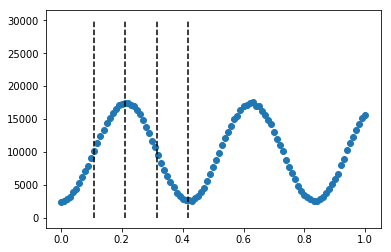

In [35]:
prep_piezo = np.loadtxt("Libro5.csv", delimiter=",",skiprows=0)
y=dar_posiciones(prep_piezo[:,0],prep_piezo[:,1],15.033,2.2)
plt.plot(prep_piezo[:,0],prep_piezo[:,1],"o")
#indices=dar_probabilidades(ecuador_laser_x,y,ecuador_laser_0de9,toma1c2a,
                          # toma1a2c)[1]
#probabilidades=dar_probabilidades(ecuador_laser_x,y,ecuador_laser_0de9,toma1c2a,
                          # toma1a2c)[0]
print(y)
plt.plot([y[1],y[1]],[0,30000],"--",c='k')
plt.plot([y[2],y[2]],[0,30000],"--",c='k')
plt.plot([y[3],y[3]],[0,30000],"--",c='k')
plt.plot([y[4],y[4]],[0,30000],"--",c='k')

##Importar datos

In [36]:
import pandas as pd
xl = pd.ExcelFile("20171023Camino1ACamino2AToma1_reducido.xlsx")
x2 = pd.ExcelFile("20171023Camino1ACamino2CToma1_reducido.xlsx")
x3 = pd.ExcelFile("20171023Camino1CCamino2AToma1_reducido.xlsx")

data1A2A = np.array(xl.parse("promedio"))
data1A2C = np.array(x2.parse("promedio"))
data1C2A = np.array(x3.parse("promedio"))

data1A2A[:,6] = data1A2A[:,6]-900
data1A2C[:,6] = data1A2C[:,6]-900
data1C2A[:,6] = data1C2A[:,6]-900


/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


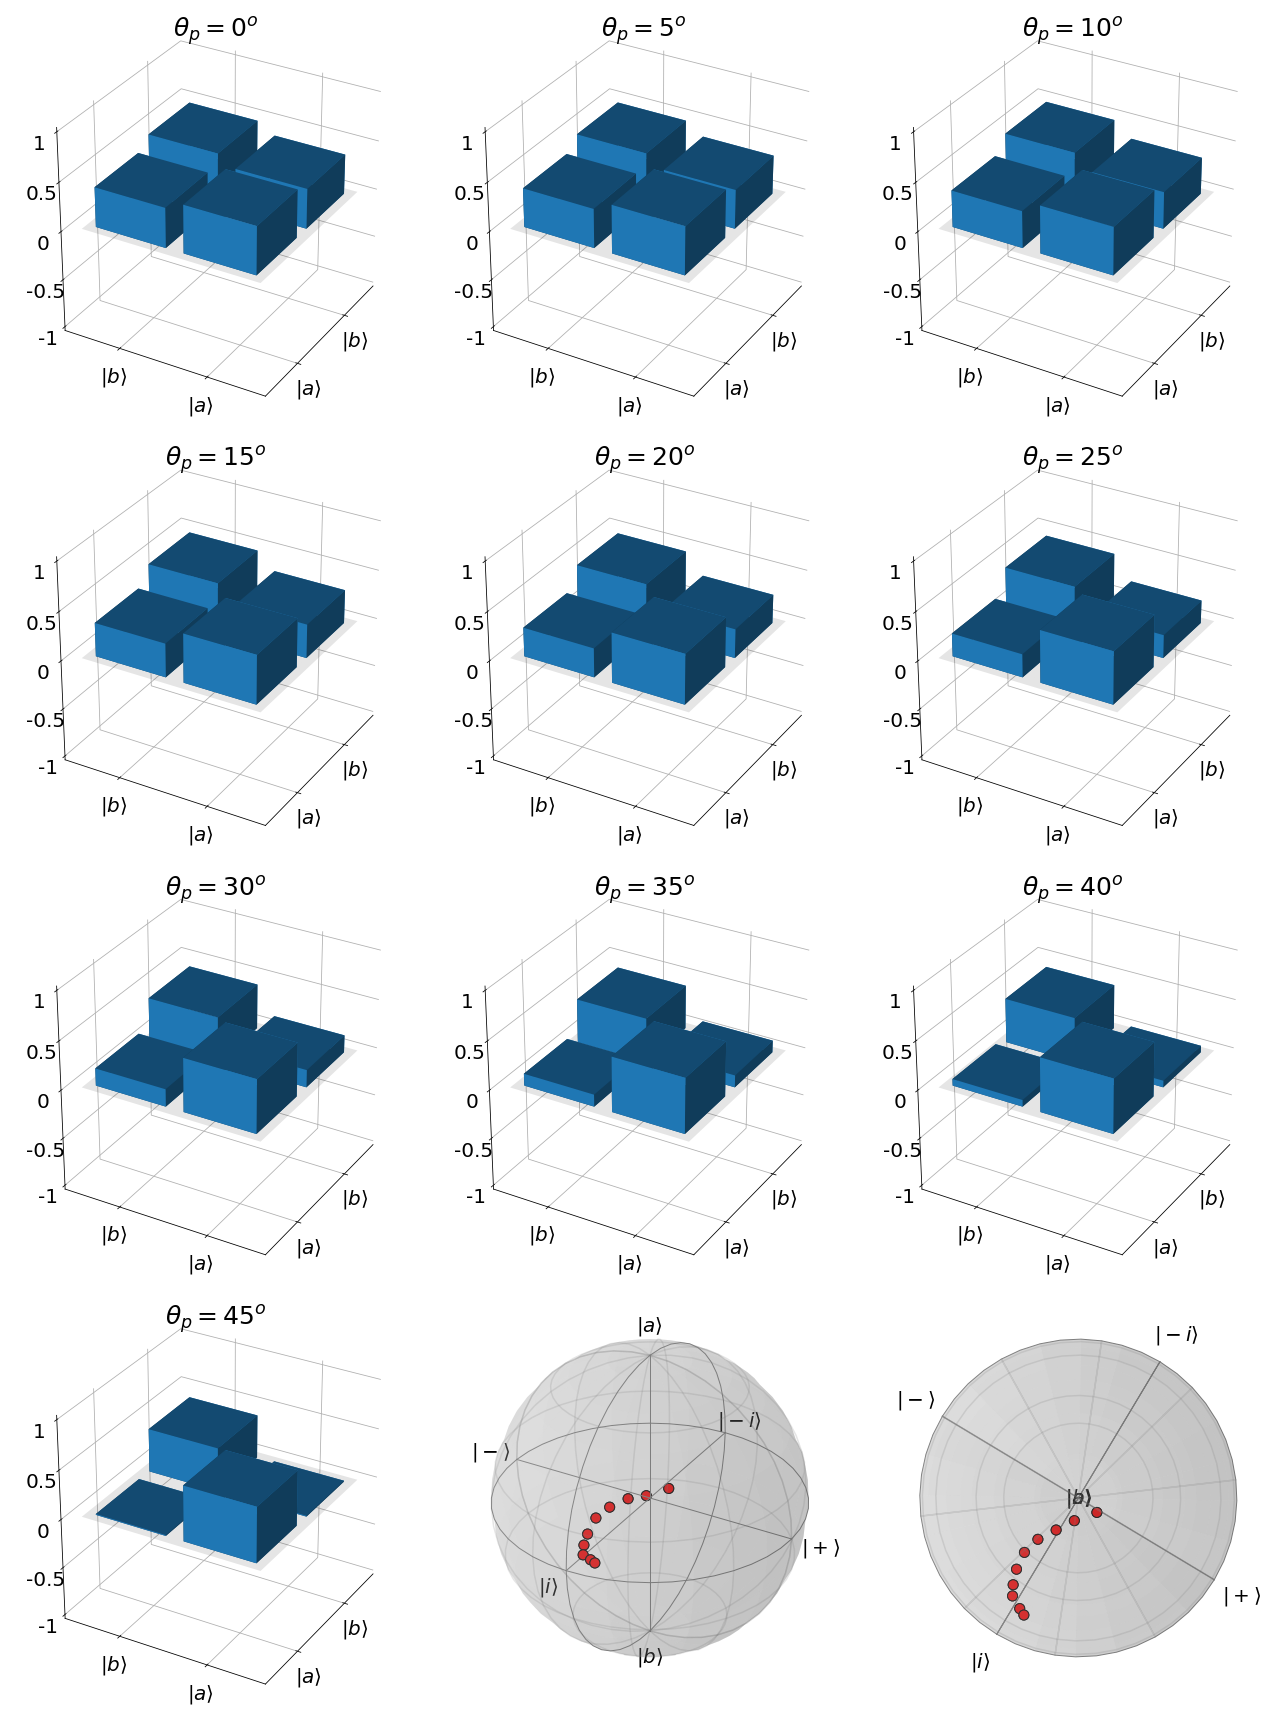

In [37]:
pos1,pos2,pos3,pos4,a1,a2=dar_estadisticas_camino(data1A2C,data1C2A,data1A2A)

matrices=[]
parametros=[]
purezas_eq=[]

for i in range (10):
    probs=dar_probabilidades(pos2[i,6],pos4[i,6],pos3[i,6],pos1[i,6],a1[i],a2[i])
    density_matrix=dar_real_matriz(dar_matriz_densidad(probs)[0])
    matrices.append(density_matrix)
    parametros.append(dar_matriz_densidad(probs)[1])
    purezas_eq.append(dar_pureza(dar_matriz_densidad(probs)[0]))

fig=figure(figsize(18,24))
ax1 = fig.add_subplot(431,projection='3d')
ax1.set_title(r'$\theta_{p}=0^o$',fontsize=25)
ax2 = fig.add_subplot(432,projection='3d')
ax2.set_title(r'$\theta_{p}=5^o$',fontsize=25)
ax3 = fig.add_subplot(433,projection='3d')
ax3.set_title(r'$\theta_{p}=10^o$',fontsize=25)
ax4 = fig.add_subplot(434,projection='3d')
ax4.set_title(r'$\theta_{p}=15^o$',fontsize=25)
ax5 = fig.add_subplot(435,projection='3d')
ax5.set_title(r'$\theta_{p}=20^o$',fontsize=25)
ax6 = fig.add_subplot(436,projection='3d')
ax6.set_title(r'$\theta_{p}=25^o$',fontsize=25)
ax7 = fig.add_subplot(437,projection='3d')
ax7.set_title(r'$\theta_{p}=30^o$',fontsize=25)
ax8 = fig.add_subplot(438,projection='3d')
ax8.set_title(r'$\theta_{p}=35^o$',fontsize=25)
ax9 = fig.add_subplot(439,projection='3d')
ax9.set_title(r'$\theta_{p}=40^o$',fontsize=25)
ax10 = fig.add_subplot(4,3,10,projection='3d')
ax10.set_title(r'$\theta_{p}=45^o$',fontsize=25)
ax11 = fig.add_subplot(4,3,11,projection='3d')
ax12 = fig.add_subplot(4,3,12,projection='3d')
ax12.view_init(90, -60)

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]


for i in range (10):
    barPlot(matrices[i],axes[i])
    

b=Bloch(axes=ax11,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()

b=Bloch(axes=ax12,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()
fig.savefig("Diag_deph.png")

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


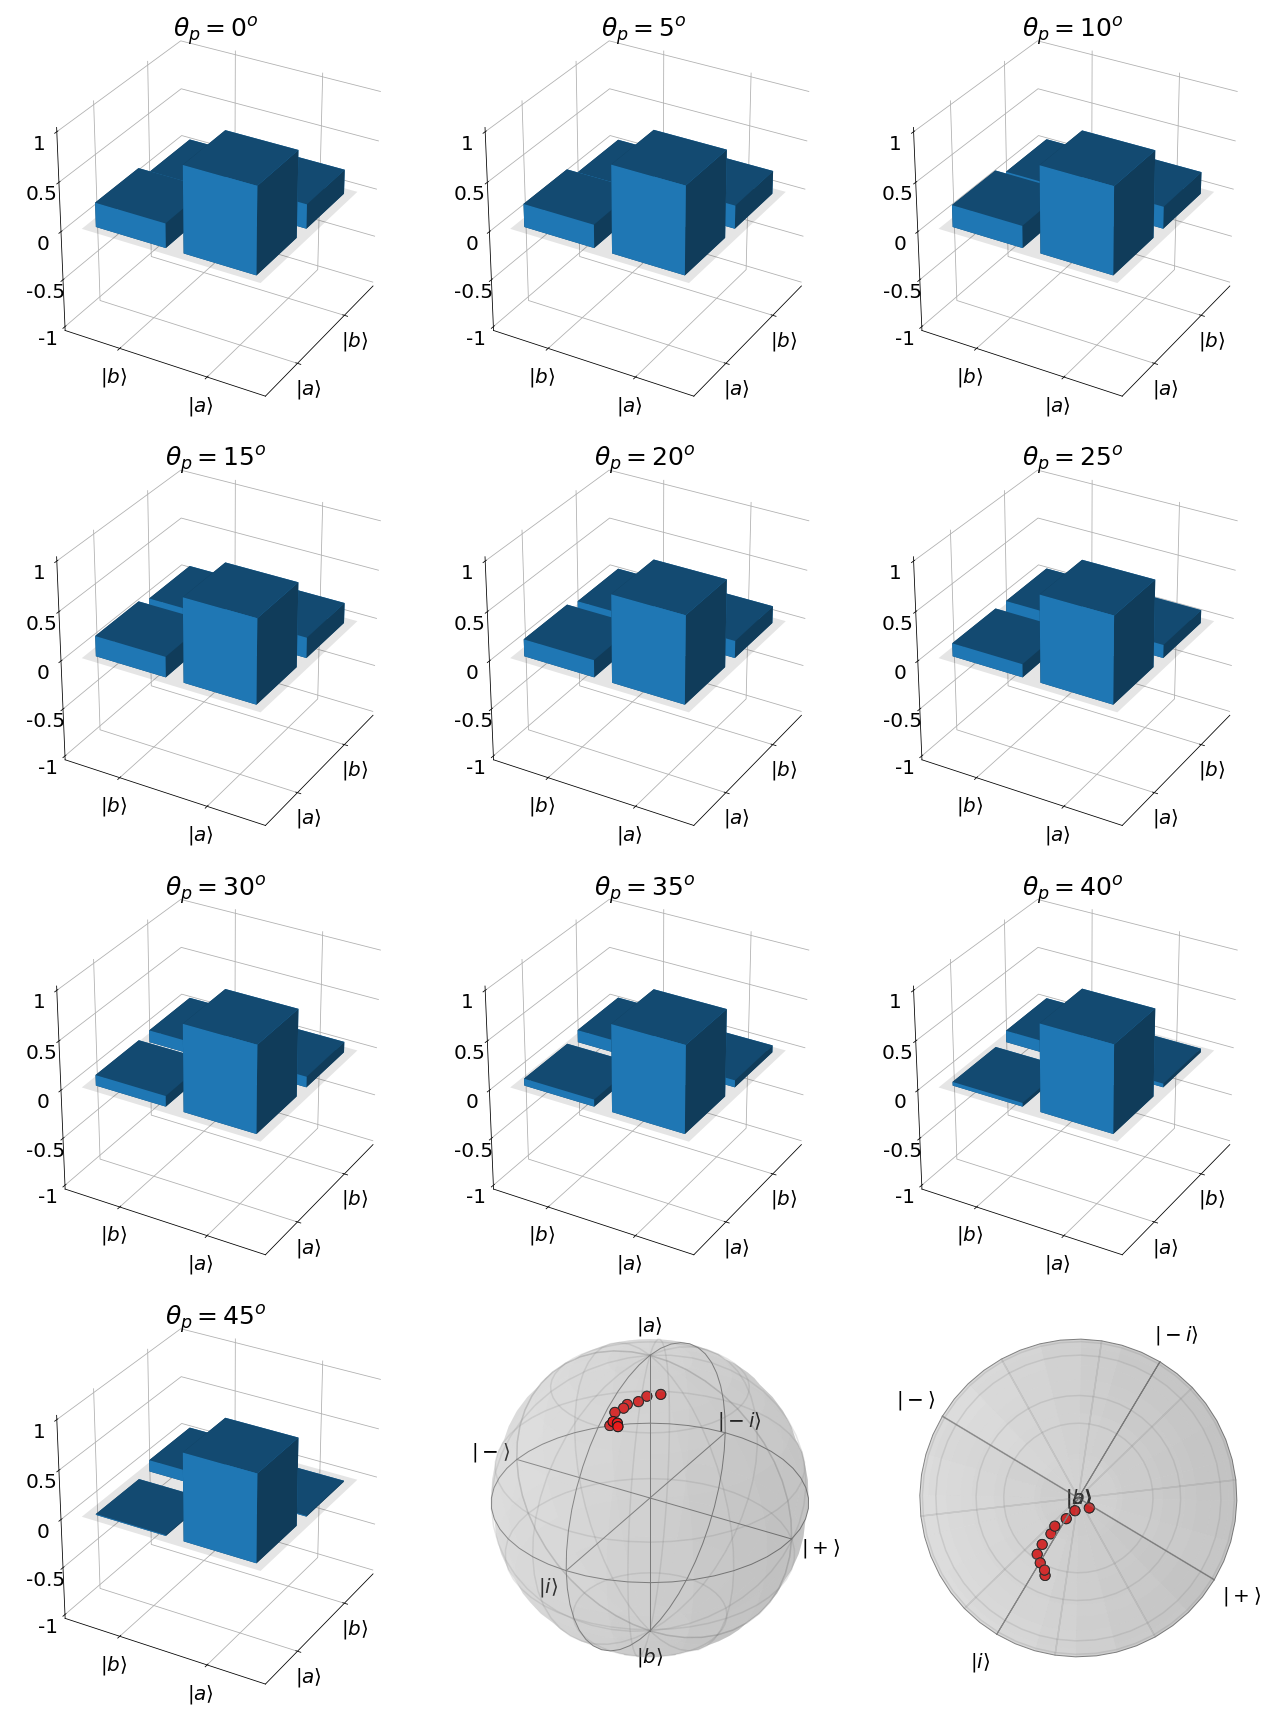

In [38]:
pos1,pos2,pos3,pos4,a1,a2=dar_estadisticas_camino(data1A2C,data1C2A,data1A2A)

matrices=[]
parametros=[]
purezas_can=[]

for i in range (10,20):
    probs=dar_probabilidades(pos2[i,6],pos4[i,6],pos3[i,6],pos1[i,6],a1[i],a2[i])
    density_matrix=dar_real_matriz(dar_matriz_densidad(probs)[0])
    matrices.append(density_matrix)
    parametros.append(dar_matriz_densidad(probs)[1])
    purezas_can.append(dar_pureza(dar_matriz_densidad(probs)[0]))

fig=figure(figsize(18,24))
ax1 = fig.add_subplot(431,projection='3d')
ax1.set_title(r'$\theta_{p}=0^o$',fontsize=25)
ax2 = fig.add_subplot(432,projection='3d')
ax2.set_title(r'$\theta_{p}=5^o$',fontsize=25)
ax3 = fig.add_subplot(433,projection='3d')
ax3.set_title(r'$\theta_{p}=10^o$',fontsize=25)
ax4 = fig.add_subplot(434,projection='3d')
ax4.set_title(r'$\theta_{p}=15^o$',fontsize=25)
ax5 = fig.add_subplot(435,projection='3d')
ax5.set_title(r'$\theta_{p}=20^o$',fontsize=25)
ax6 = fig.add_subplot(436,projection='3d')
ax6.set_title(r'$\theta_{p}=25^o$',fontsize=25)
ax7 = fig.add_subplot(437,projection='3d')
ax7.set_title(r'$\theta_{p}=30^o$',fontsize=25)
ax8 = fig.add_subplot(438,projection='3d')
ax8.set_title(r'$\theta_{p}=35^o$',fontsize=25)
ax9 = fig.add_subplot(439,projection='3d')
ax9.set_title(r'$\theta_{p}=40^o$',fontsize=25)
ax10 = fig.add_subplot(4,3,10,projection='3d')
ax10.set_title(r'$\theta_{p}=45^o$',fontsize=25)
ax11 = fig.add_subplot(4,3,11,projection='3d')
ax12 = fig.add_subplot(4,3,12,projection='3d')
ax12.view_init(90, -60)

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for i in range (10):
    barPlot(matrices[i],axes[i])

b=Bloch(axes=ax11,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()

b=Bloch(axes=ax12,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()
fig.savefig('Cancer_Deph.png')

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


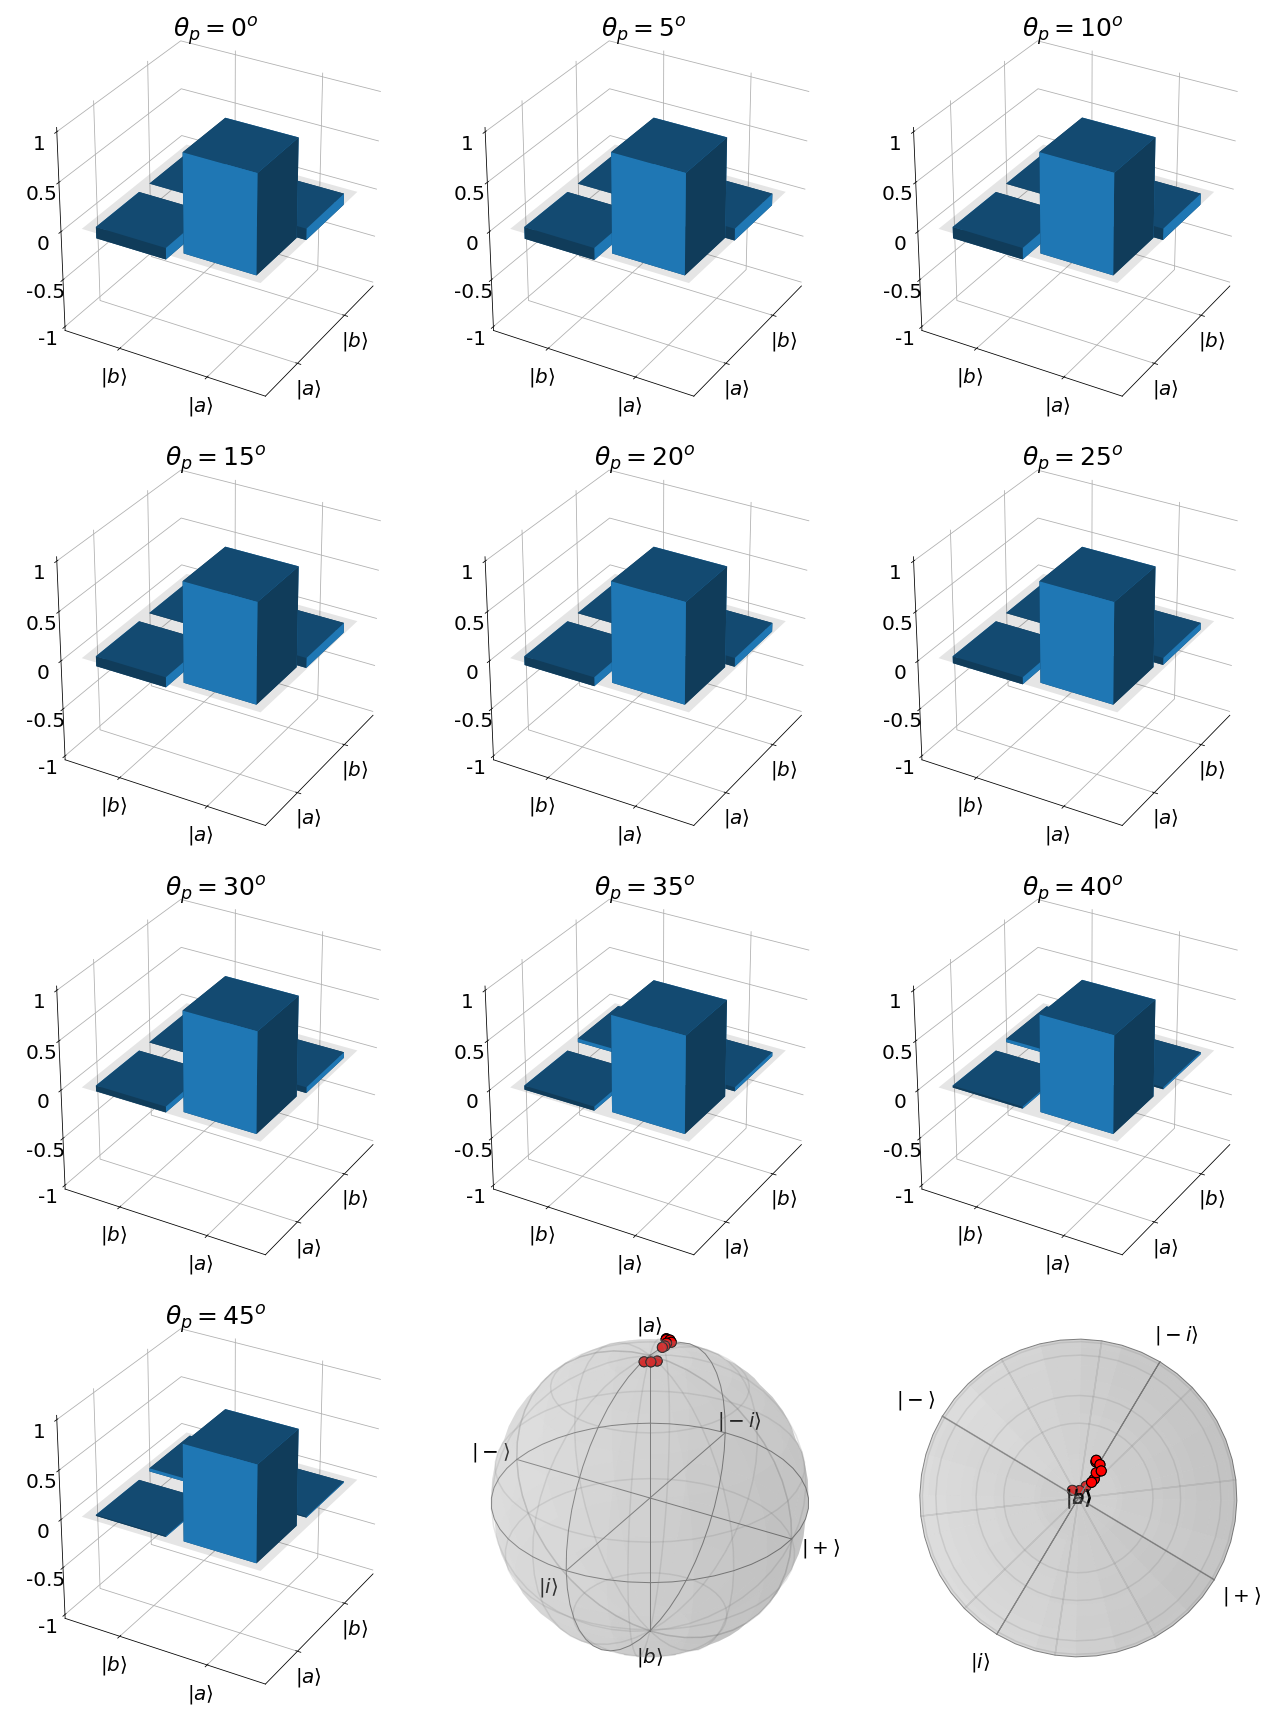

In [39]:
pos1,pos2,pos3,pos4,a1,a2=dar_estadisticas_camino(data1A2C,data1C2A,data1A2A)

matrices=[]
parametros=[]
purezas_nor=[]

for i in range (20,30):
    probs=dar_probabilidades(pos2[i,6],pos4[i,6],pos3[i,6],pos1[i,6],a1[i],a2[i])
    density_matrix=dar_real_matriz(dar_matriz_densidad(probs)[0])
    matrices.append(density_matrix)
    parametros.append(dar_matriz_densidad(probs)[1])
    purezas_nor.append(dar_pureza(dar_matriz_densidad(probs)[0]))

fig=figure(figsize(18,24))
ax1 = fig.add_subplot(431,projection='3d')
ax1.set_title(r'$\theta_{p}=0^o$',fontsize=25)
ax2 = fig.add_subplot(432,projection='3d')
ax2.set_title(r'$\theta_{p}=5^o$',fontsize=25)
ax3 = fig.add_subplot(433,projection='3d')
ax3.set_title(r'$\theta_{p}=10^o$',fontsize=25)
ax4 = fig.add_subplot(434,projection='3d')
ax4.set_title(r'$\theta_{p}=15^o$',fontsize=25)
ax5 = fig.add_subplot(435,projection='3d')
ax5.set_title(r'$\theta_{p}=20^o$',fontsize=25)
ax6 = fig.add_subplot(436,projection='3d')
ax6.set_title(r'$\theta_{p}=25^o$',fontsize=25)
ax7 = fig.add_subplot(437,projection='3d')
ax7.set_title(r'$\theta_{p}=30^o$',fontsize=25)
ax8 = fig.add_subplot(438,projection='3d')
ax8.set_title(r'$\theta_{p}=35^o$',fontsize=25)
ax9 = fig.add_subplot(439,projection='3d')
ax9.set_title(r'$\theta_{p}=40^o$',fontsize=25)
ax10 = fig.add_subplot(4,3,10,projection='3d')
ax10.set_title(r'$\theta_{p}=45^o$',fontsize=25)
ax11 = fig.add_subplot(4,3,11,projection='3d')
ax12 = fig.add_subplot(4,3,12,projection='3d')
ax12.view_init(90, -60)
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for i in range (10):
    barPlot(matrices[i],axes[i])

b=Bloch(axes=ax11,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()

b=Bloch(axes=ax12,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()
fig.savefig('Norte_deph.png')

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


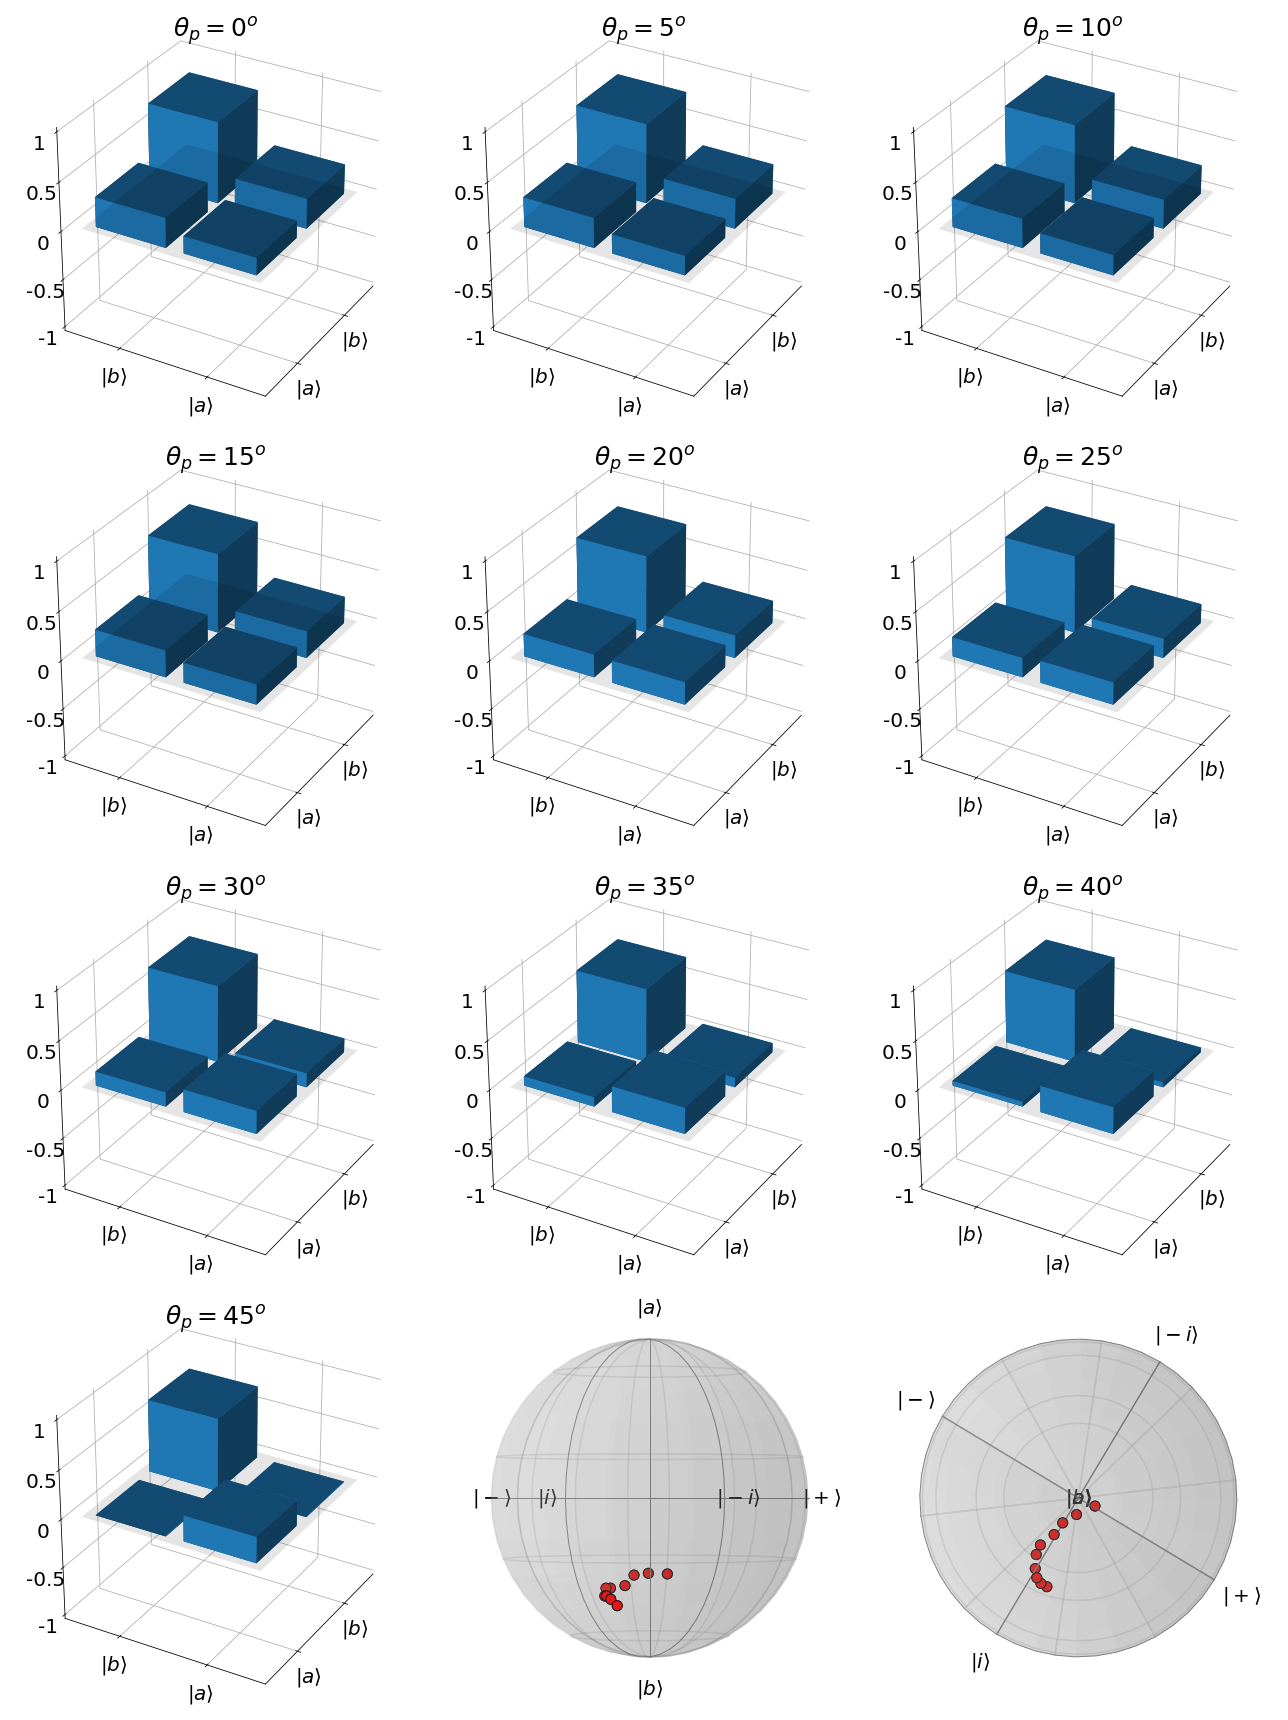

In [40]:
pos1,pos2,pos3,pos4,a1,a2=dar_estadisticas_camino(data1A2C,data1C2A,data1A2A)

matrices=[]
parametros=[]
purezas_cap=[]

for i in range (30,40):
    probs=dar_probabilidades(pos2[i,6],pos4[i,6],pos3[i,6],pos1[i,6],a1[i],a2[i])
    density_matrix=dar_real_matriz(dar_matriz_densidad(probs)[0])
    matrices.append(density_matrix)
    parametros.append(dar_matriz_densidad(probs)[1])
    purezas_cap.append(dar_pureza(dar_matriz_densidad(probs)[0]))

fig=figure(figsize(18,24))
ax1 = fig.add_subplot(431,projection='3d')
ax1.set_title(r'$\theta_{p}=0^o$',fontsize=25)
ax2 = fig.add_subplot(432,projection='3d')
ax2.set_title(r'$\theta_{p}=5^o$',fontsize=25)
ax3 = fig.add_subplot(433,projection='3d')
ax3.set_title(r'$\theta_{p}=10^o$',fontsize=25)
ax4 = fig.add_subplot(434,projection='3d')
ax4.set_title(r'$\theta_{p}=15^o$',fontsize=25)
ax5 = fig.add_subplot(435,projection='3d')
ax5.set_title(r'$\theta_{p}=20^o$',fontsize=25)
ax6 = fig.add_subplot(436,projection='3d')
ax6.set_title(r'$\theta_{p}=25^o$',fontsize=25)
ax7 = fig.add_subplot(437,projection='3d')
ax7.set_title(r'$\theta_{p}=30^o$',fontsize=25)
ax8 = fig.add_subplot(438,projection='3d')
ax8.set_title(r'$\theta_{p}=35^o$',fontsize=25)
ax9 = fig.add_subplot(439,projection='3d')
ax9.set_title(r'$\theta_{p}=40^o$',fontsize=25)
ax10 = fig.add_subplot(4,3,10,projection='3d')
ax10.set_title(r'$\theta_{p}=45^o$',fontsize=25)
ax11 = fig.add_subplot(4,3,11,projection='3d')
ax12 = fig.add_subplot(4,3,12,projection='3d')
ax12.view_init(90, -60)
ax11.view_init(0, -60)

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for i in range (10):
    barPlot(matrices[i],axes[i])

b=Bloch(axes=ax11,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()

b=Bloch(axes=ax12,fig=fig)
b.zlabel=[r'$\left|a\right>$', r'$\left|b\right>$']
b.ylabel=[r'$\left|+\right>$', r'$\left|-\right>$']
b.xlabel=[r'$\left|i\right>$', r'$\left|-i\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.point_color=['r']
b.point_marker=['o']
for i in range(10):
    b.add_points(parametros[i])
b.point_size=[100,100,100,100]
b.make_sphere()
fig.savefig('Capri_deph.png')

In [41]:
def dar_estado(thetac,thetapol):
    a=double(cos(thetac)*cos(thetapol))
    b=double(cos(thetac)*sin(thetapol))
    c=double(sin(thetac))
    state=a*tensor(basis(2,0),basis(2,0))+b*tensor(basis(2,0),basis(2,1))+c*tensor(basis(2,1),basis(2,0))
    return state
    

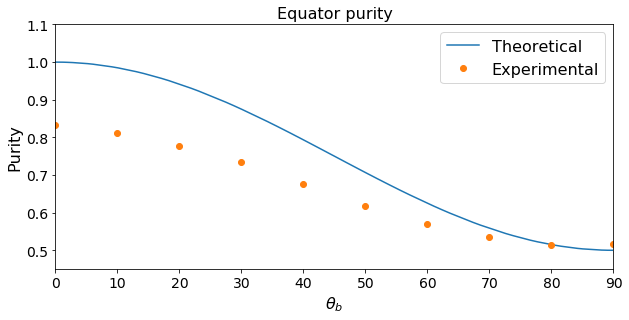

In [63]:
xs=linspace(0,np.pi/2,1000)
angulos=linspace(0,90,10)
data=[]
figure(figsize(10,4.5))
for x in xs:
    a=(dar_estado(pi/4,x).ptrace(0)).full()
    b=dar_pureza(a)
    data.append(b)
plt.plot(rad2deg(xs),np.array(data),label='Theoretical')
plt.plot(angulos,purezas_eq,'o',label='Experimental')
ylim(0.45,1.1)
xlim(0,90)
ylabel('Purity',fontsize=16)
xlabel(r'$\theta_b$',fontsize=16)
legend(fontsize=16)
yticks(fontsize=14)
xticks(fontsize=14)
title('Equator purity',fontsize=16)
savefig('eqpur.png')

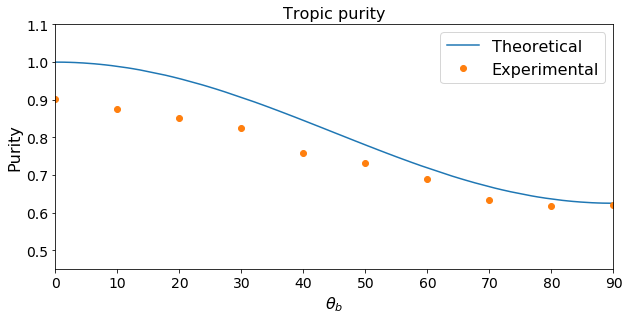

In [65]:
xs=linspace(0,np.pi/2,1000)
angulos=linspace(0,90,10)
data=[]
figure(figsize(10,4.5))
for x in xs:
    a=(dar_estado(pi/6,x).ptrace(0)).full()
    b=dar_pureza(a)
    data.append(b)
plt.plot(rad2deg(xs),np.array(data),label='Theoretical')
plt.plot(angulos,purezas_cap,'o',label='Experimental')
ylim(0.45,1.1)
xlim(0,90)
ylabel('Purity',fontsize=16)
xlabel(r'$\theta_b$',fontsize=16)
legend(fontsize=16)
yticks(fontsize=14)
xticks(fontsize=14)
title('Tropic purity',fontsize=16)
savefig('troppur.png')

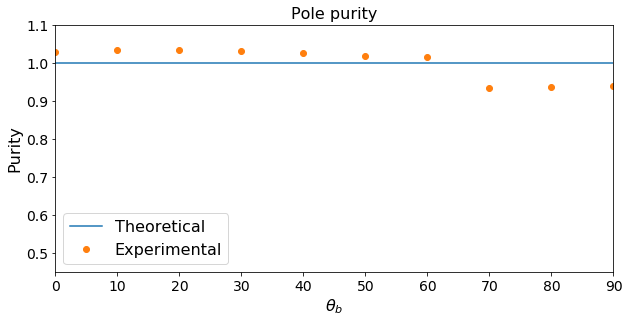

In [66]:
xs=linspace(0,np.pi/2,1000)
angulos=linspace(0,90,10)
data=[]
figure(figsize(10,4.55))
for x in xs:
    a=(dar_estado(pi/2,x).ptrace(0)).full()
    b=dar_pureza(a)
    data.append(b)
plt.plot(rad2deg(xs),np.array(data),label='Theoretical')
plt.plot(angulos,purezas_nor,'o',label='Experimental')
ylim(0.45,1.1)
xlim(0,90)
ylabel('Purity',fontsize=16)
xlabel(r'$\theta_b$',fontsize=16)
legend(fontsize=16)
yticks(fontsize=14)
xticks(fontsize=14)
title('Pole purity',fontsize=16)
savefig("polepur.png")

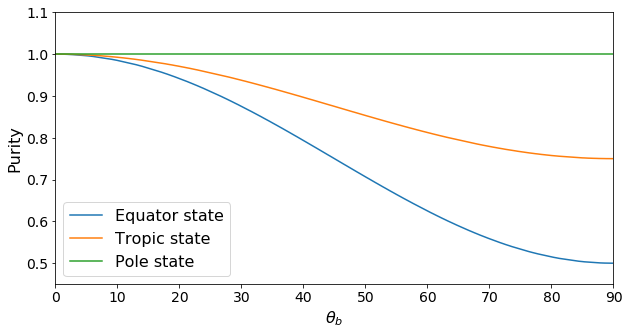

In [67]:
xs=linspace(0,np.pi/2,1000)
data1=[]
data2=[]
data3=[]
figure(figsize(10,5))
for x in xs:
    a=(dar_estado(pi/4,x).ptrace(0)).full()
    b=dar_pureza(a)
    data1.append(b)
    a=(dar_estado(pi/8,x).ptrace(0)).full()
    b=dar_pureza(a)
    data2.append(b)
    a=(dar_estado(pi/2,x).ptrace(0)).full()
    b=dar_pureza(a)
    data3.append(b)
plt.plot(rad2deg(xs),np.array(data1),label='Equator state')
plt.plot(rad2deg(xs),np.array(data2),label='Tropic state')
plt.plot(rad2deg(xs),np.array(data3),label='Pole state')
ylim(0.45,1.1)
xlim(0,90)
ylabel('Purity',fontsize=16)
xlabel(r'$\theta_b$',fontsize=16)
legend(fontsize=16)
yticks(fontsize=14)
xticks(fontsize=14)
savefig('teoricapurezas.png')

In [46]:
rad2deg(np.pi/8)

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


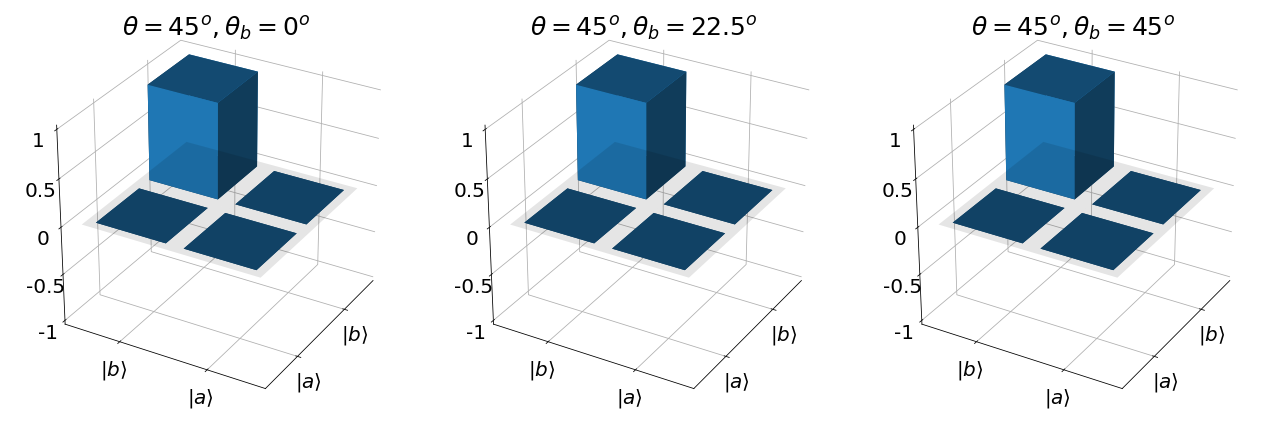

In [51]:
fig3=figure(figsize(18,6))

ax7 = fig3.add_subplot(131,projection='3d')
ax7.set_title(r'$\theta=45^o,\theta_{b}=0^o$',fontsize=25)
ax8 = fig3.add_subplot(132,projection='3d')
ax8.set_title(r'$\theta=45^o,\theta_{b}=22.5^o$',fontsize=25)
ax9 = fig3.add_subplot(133,projection='3d')
ax9.set_title(r'$\theta=45^o,\theta_{b}=45^o$',fontsize=25)




m7=(dar_estado(0,0).ptrace(0)).full()
m8=(dar_estado(0,pi/4).ptrace(0)).full()
m9=(dar_estado(0,pi/2).ptrace(0)).full()


barPlot(real(m7).ravel(),ax7)
barPlot(real(m8).ravel(),ax8)
barPlot(real(m9).ravel(),ax9)



fig3.savefig('teoricamatrices3.png')


/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


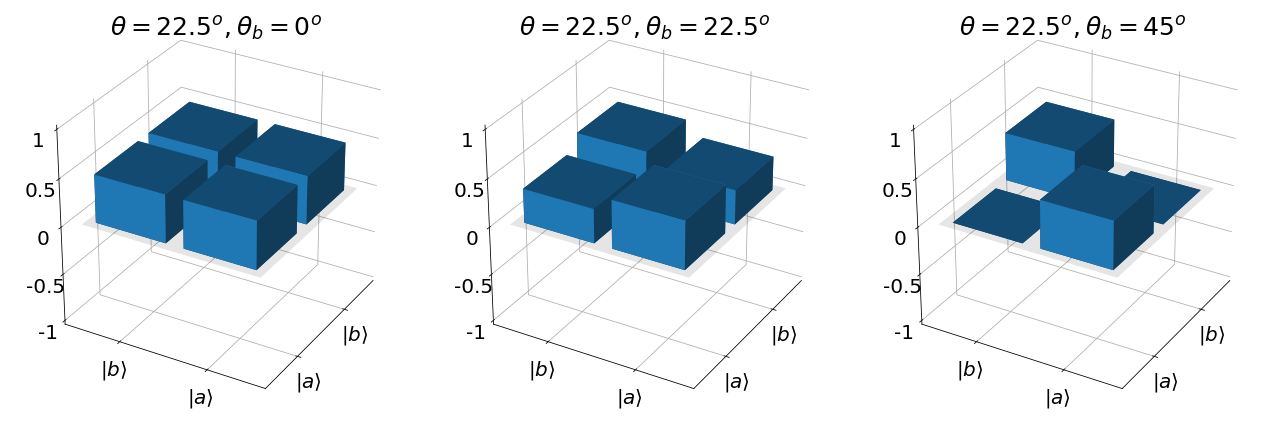

In [53]:
fig1=figure(figsize(18,6))
ax1 = fig1.add_subplot(131,projection='3d')
ax1.set_title(r'$\theta=22.5^o,\theta_{b}=0^o$',fontsize=25)
ax2 = fig1.add_subplot(132,projection='3d')
ax2.set_title(r'$\theta=22.5^o,\theta_{b}=22.5^o$',fontsize=25)
ax3 = fig1.add_subplot(133,projection='3d')
ax3.set_title(r'$\theta=22.5^o,\theta_{b}=45^o$',fontsize=25)
m1=(dar_estado(pi/4,0).ptrace(0)).full()
m2=(dar_estado(pi/4,pi/4).ptrace(0)).full()
m3=(dar_estado(pi/4,pi/2).ptrace(0)).full()
barPlot(real(m1).ravel(),ax1)
barPlot(real(m2).ravel(),ax2)
barPlot(real(m3).ravel(),ax3)

fig1.savefig('teoricamatrices1.png')

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


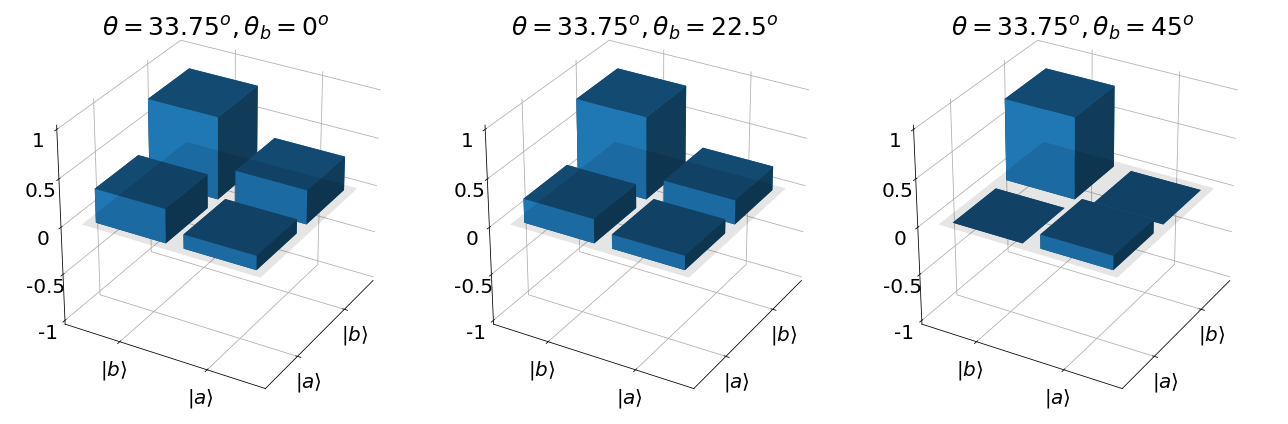

In [55]:
fig2=figure(figsize(18,6))

ax4 = fig2.add_subplot(131,projection='3d')
ax4.set_title(r'$\theta=33.75^o,\theta_{b}=0^o$',fontsize=25)
ax5 = fig2.add_subplot(132,projection='3d')
ax5.set_title(r'$\theta=33.75^o,\theta_{b}=22.5^o$',fontsize=25)
ax6 = fig2.add_subplot(133,projection='3d')
ax6.set_title(r'$\theta=33.75^o,\theta_{b}=45^o$',fontsize=25)

m4=(dar_estado(pi/8,0).ptrace(0)).full()
m5=(dar_estado(pi/8,pi/4).ptrace(0)).full()
m6=(dar_estado(pi/8,pi/2).ptrace(0)).full()

barPlot(real(m4).ravel(),ax4)
barPlot(real(m5).ravel(),ax5)
barPlot(real(m6).ravel(),ax6)
fig2.savefig('teoricamatrices2.png')